<h1 align='center'><b>Machine Learning Algorithms for Classification</b></h1>
<p align='center'><img src=https://estatsite.com.br/wp-content/uploads/2021/06/programming-code-coding-or-hacker-background-programming-code-icon-made-with-binary-code-digital-binary-data-and-streaming-digital-code-vector-1200x675.jpg heigth='350' width='600'></p>

<p align='justify'>Nós faremos uso de 2 (dois) dos primeiros algoritmos de aprendizado de máquina descritos por algoritmos para classificação: o perceptron e os neurônios lineares adaptativos. Vamos implementar um perceptron passo a passo em Python e treiná-lo para classificar diferentes espécies de flores no conjunto de dados Iris, muito famoso por sinal. Isso nos ajudará a entender o conceito de algoritmos de aprendizado de máquina para classificação e como eles podem ser implementados com eficiência em Python.</p>


<h2>Aplicações</h2>

In [8]:
# Padronizando as bibliotecas usadas e as versões
%watermark -a "Willian Pina" -u -d -p numpy,pandas,matplotlib

Author: Willian Pina

Last updated: 2022-04-10

numpy     : 1.21.5
pandas    : 1.2.5
matplotlib: 3.5.1



In [9]:
# Implementando um perceptron em Python
import numpy as np


class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<p align='justify'>Usando esta implementação do <i>Perceptron</i>, agora podemos inicializar novos Perceptron objetos com uma determinada taxa de aprendizado, <i>eta</i>, e o número de <i>epoch</i>, <i>n_iter</i> (passa sobre o conjunto de dados de treinamento).</p>

<h4>Treinando um modelo <i>Perceptron</i> no conjunto de dados Iris</h4>
<p align='justify'>Consideraremos apenas duas classes de flores, Setosa e Versicolor, do conjunto de dados Iris por razões práticas, lembrando que o <i>perceptron</i> é um classificador binário. No entanto, o algoritmo <i>perceptron</i> pode ser estendido para classificação multiclasse — por exemplo, a técnica One vs All (OvA) - Um contra Todos.</p>

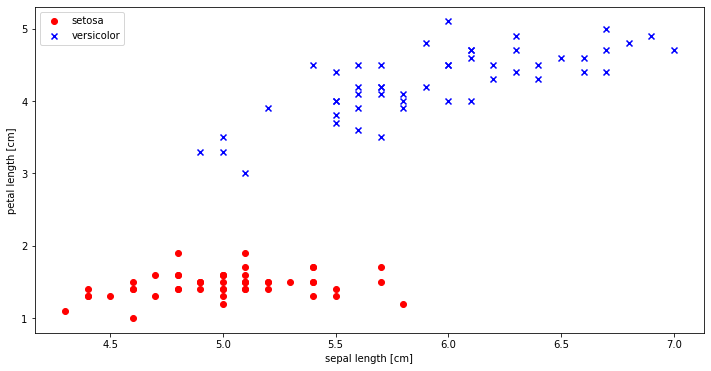

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregando os dados
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, encoding='utf-8')

# Selecionando setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extraindo sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Plotando os dados
plt.figure(figsize=(12,6))
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

<p align='justify'>O gráfico de dispersão anterior mostra a distribuição de exemplos de flores no conjunto de dados Iris ao longo dos dois eixos de recursos: comprimento da pétala e comprimento da sépala (medido em centímetros). Neste subespaço de características bidimensionais, podemos ver que há um limite de decisão linear que deve ser suficiente para separar as flores Setosa das flores Versicolor. Assim, um classificador linear como o perceptron deve ser capaz de classificar perfeitamente as flores neste conjunto de dados.</p>

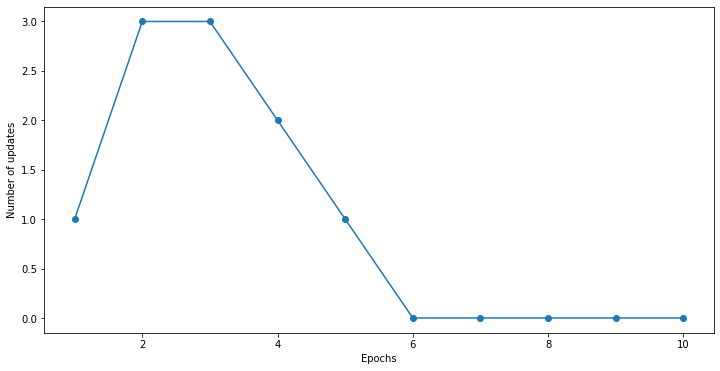

In [18]:
# Treinando o modelo Perceptron

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.figure(figsize=(12,6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()